In [1]:
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def load_dicts_from_pkl(path):
    dictionaries = {}
    
    for file_name in os.listdir(path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(path, file_name)
            name = os.path.splitext(file_name)[0]
            
            with open(file_path, 'rb') as file:
                dictionary = pickle.load(file)
                dictionaries[name] = dictionary
    
    return dictionaries

In [3]:
models_dict_1 = load_dicts_from_pkl("loss_histories/damping_01")
models_dict_5 = load_dicts_from_pkl("loss_histories/damping_05")
models_dict_10 = load_dicts_from_pkl("loss_histories/damping_10")

In [6]:
def plot_history(models_dict):
    plt.figure(figsize=(10, 6))

    for key, model_dict in models_dict.items():
        label = f'Epsilon = {model_dict["epsilon"]}, Damping factor {model_dict["damping"]}'
        plt.plot(model_dict['loss_history']['embedding_loss_attractive_train'], 
                 model_dict['loss_history']['embedding_loss_repulsive_train'],
                 marker='o', markersize=3, label=label)
        plt.text(model_dict['loss_history']['embedding_loss_attractive_train'][-1],
                 model_dict['loss_history']['embedding_loss_repulsive_train'][-1],
                 f'{model_dict["loss_history"]["embedding_loss_attractive_train"][-1]:.8f}', ha='center', va='bottom')

    plt.xlabel('embedding_loss_attractive_train')
    plt.ylabel('embedding_loss_repulsive_train')
    plt.title('Loss Functions')

    plt.legend()
    plt.show()

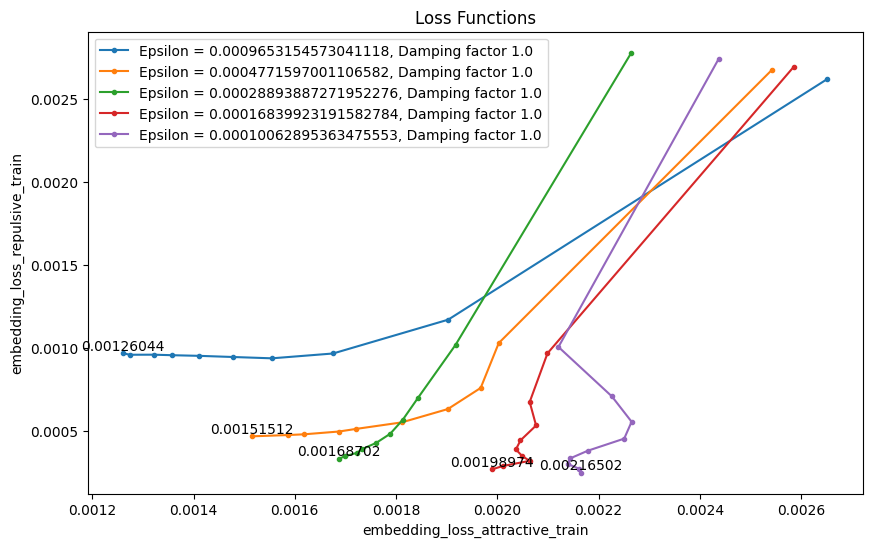

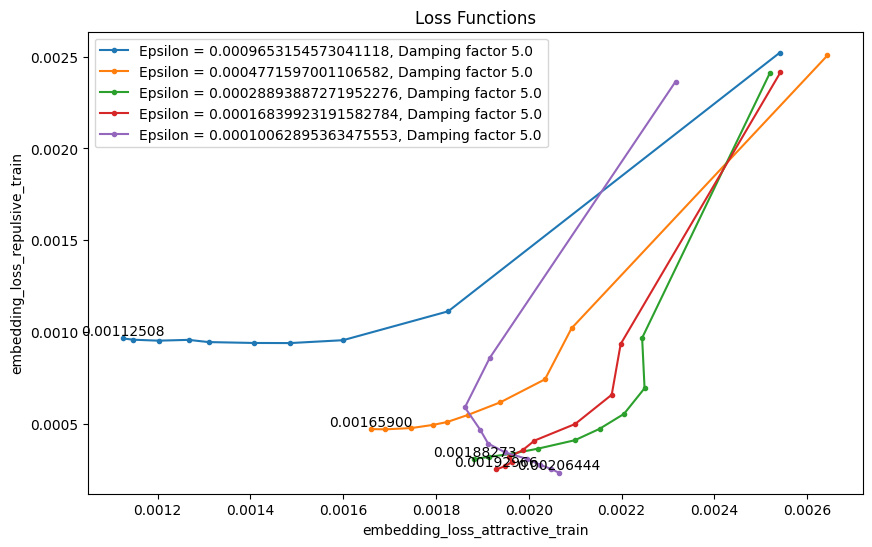

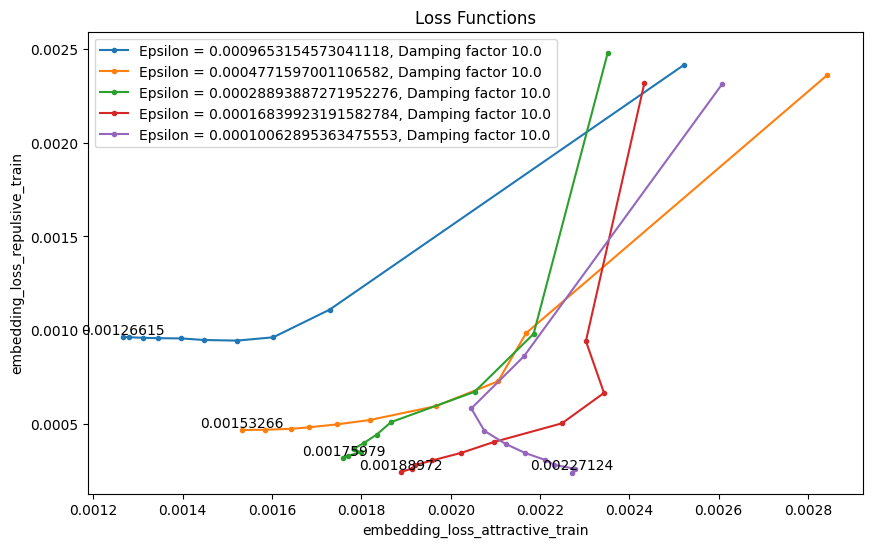

In [7]:
plot_history(models_dict_1)
plot_history(models_dict_5)
plot_history(models_dict_10)

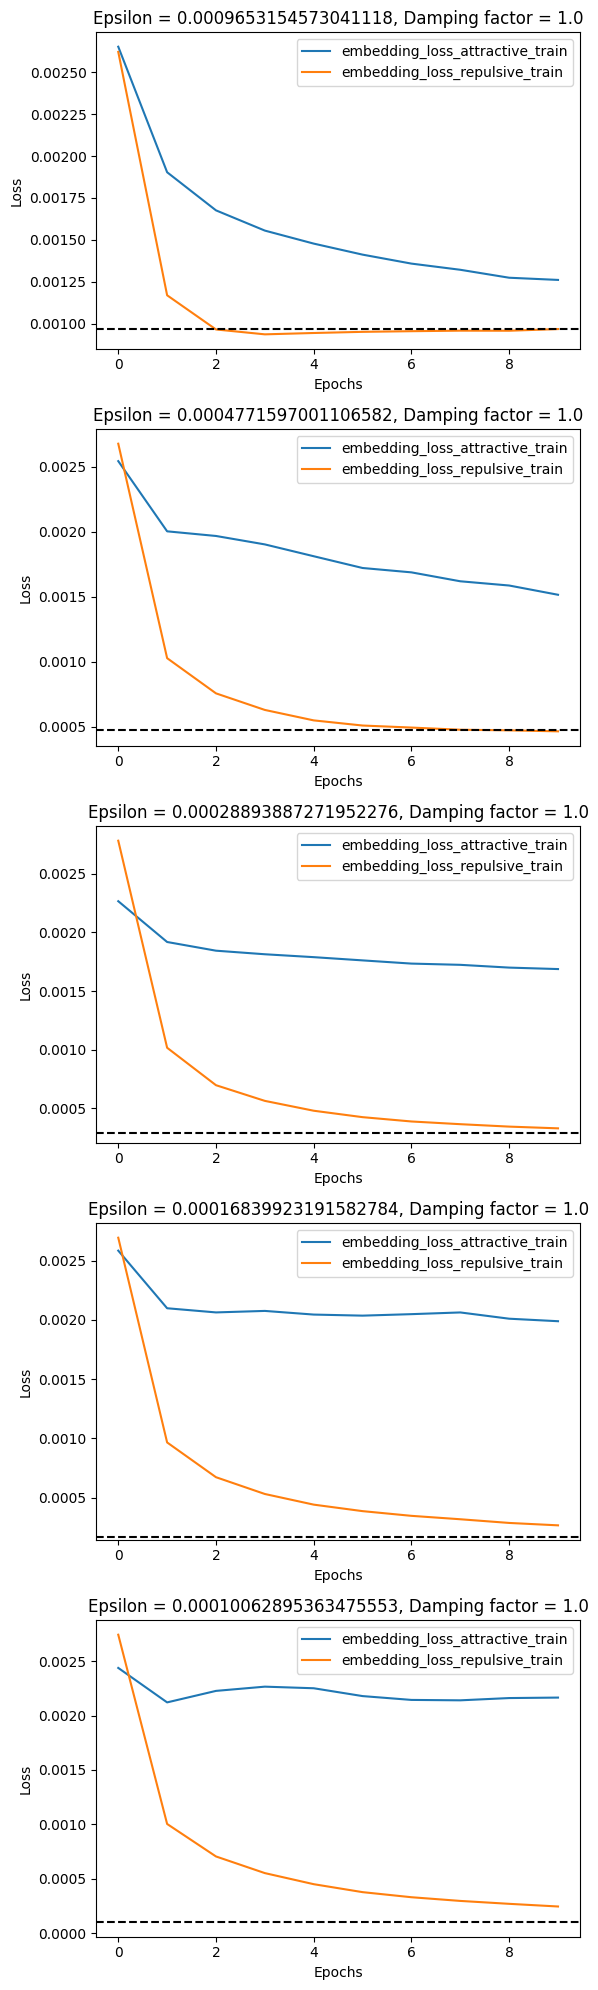

In [8]:
# Create subplots
fig, axs = plt.subplots(len(models_dict_1), 1, figsize=(6, 4*len(models_dict_1)))

for i, (key, model_dict) in enumerate(models_dict_1.items()):
    axs[i].plot(model_dict['loss_history']['embedding_loss_attractive_train'], label='embedding_loss_attractive_train')
    axs[i].plot(model_dict['loss_history']['embedding_loss_repulsive_train'], label='embedding_loss_repulsive_train')
    axs[i].axhline(model_dict["epsilon"], linestyle='--', color='black')

    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Epsilon = {model_dict["epsilon"]}, Damping factor = {model_dict["damping"]}')
    axs[i].legend()

plt.tight_layout()
plt.show()

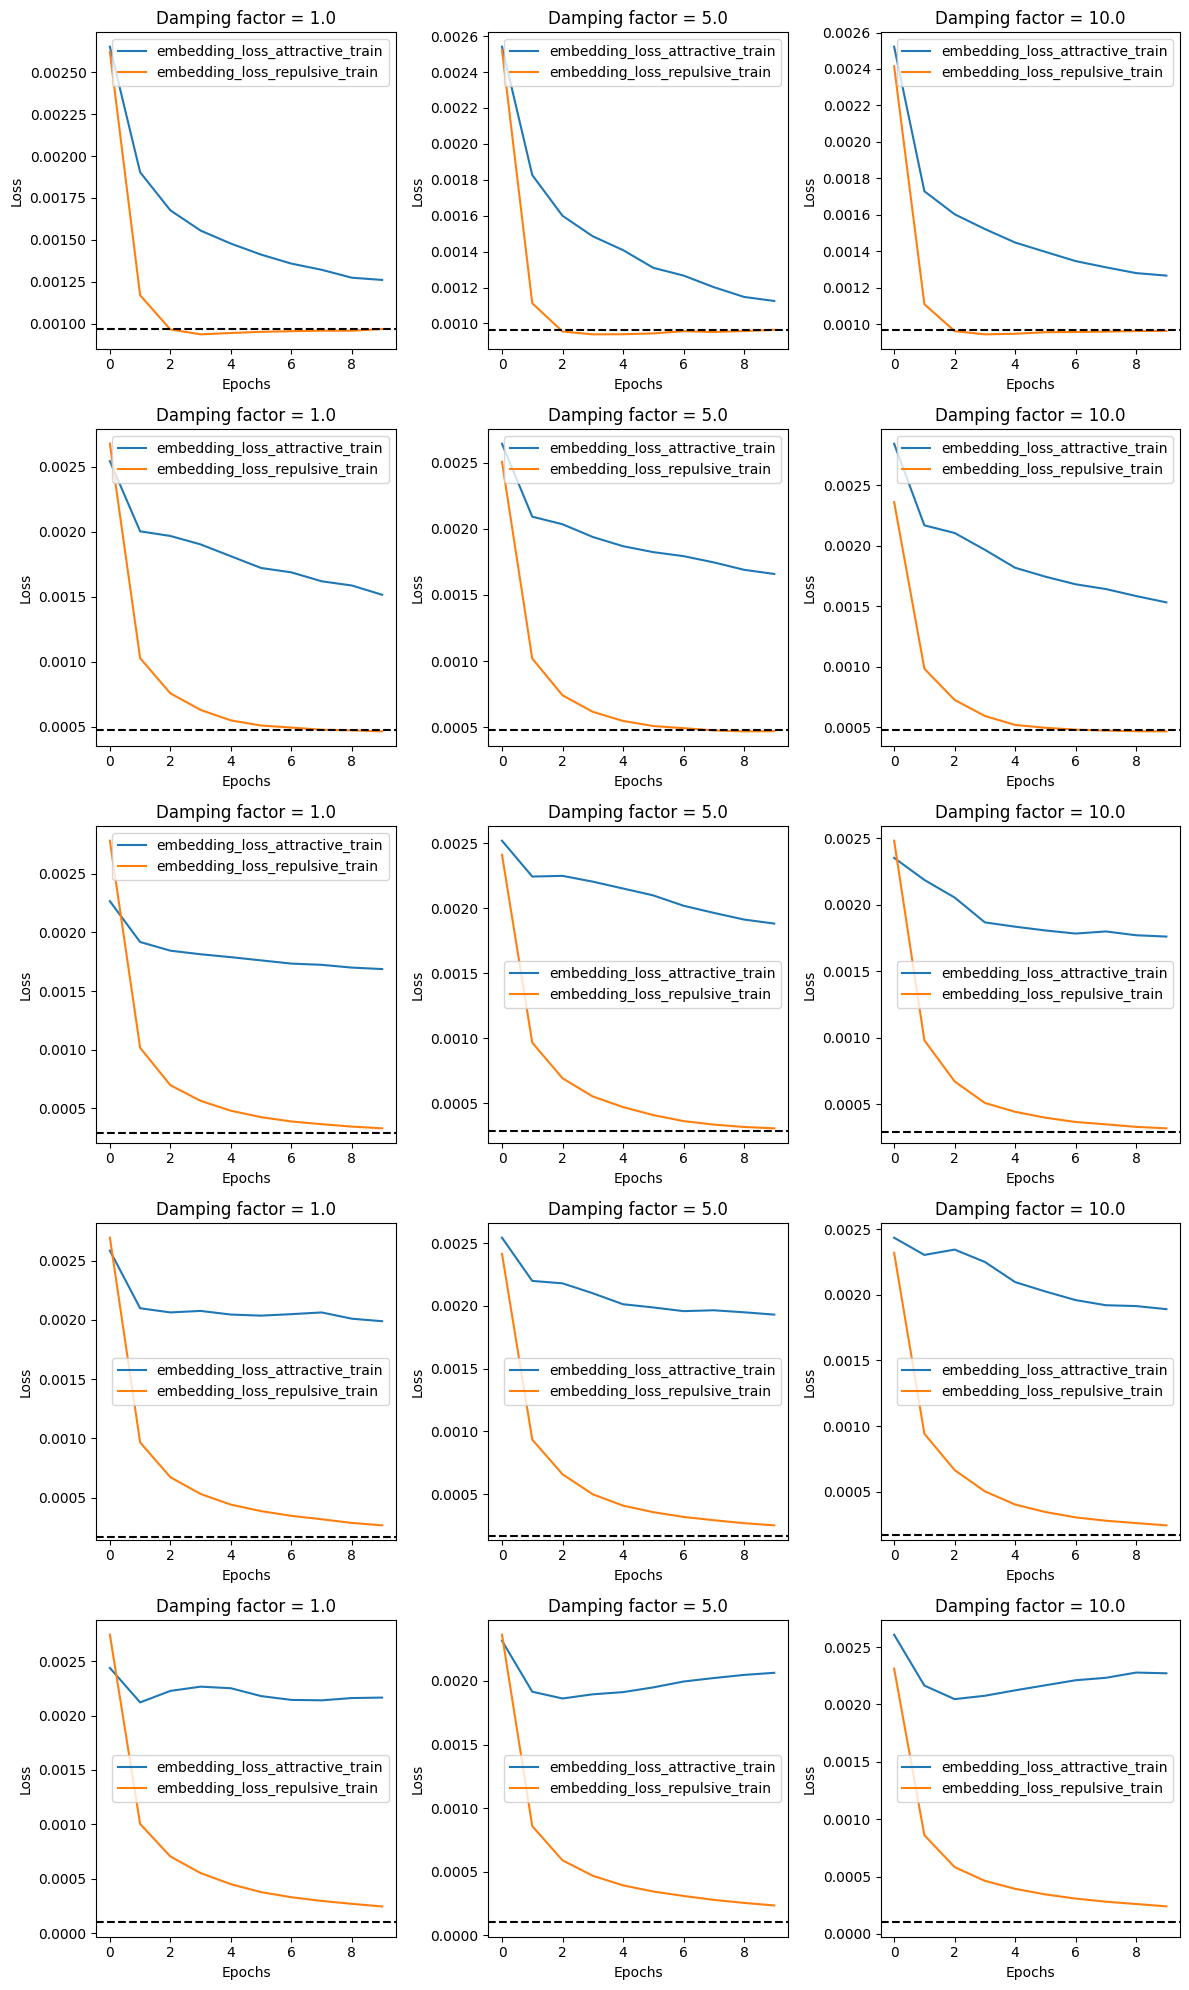

In [9]:
# Create subplots
num_rows = len(models_dict_1)
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

for i, (key, model_dict) in enumerate(models_dict_1.items()):
    model_dict_list = [model_dict]

    key_split = key.split('_')
    key_split[1] = '5.0'
    model_dict_list.append(models_dict_5['_'.join(key_split)])
    key_split[1] = '10.0'
    model_dict_list.append(models_dict_10['_'.join(key_split)])

    for j in range(3):
        axs[i,j].plot(model_dict_list[j]['loss_history']['embedding_loss_attractive_train'], label='embedding_loss_attractive_train')
        axs[i,j].plot(model_dict_list[j]['loss_history']['embedding_loss_repulsive_train'], label='embedding_loss_repulsive_train')
        axs[i,j].axhline(model_dict_list[j]["epsilon"], linestyle='--', color='black')

        axs[i,j].set_xlabel('Epochs')
        axs[i,j].set_ylabel('Loss')
        axs[i,j].set_title(f'Damping factor = {model_dict_list[j]["damping"]}')
        axs[i,j].legend()


plt.tight_layout()
plt.show()